<a href="https://colab.research.google.com/github/manualAlan/ComPhys/blob/main/quantum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
import math
import numpy as np
myState2=[
   (numpy.sqrt(0.1)*1.j, '101'),
   (numpy.sqrt(0.5), '000') ,
   (-numpy.sqrt(0.4), '010' )]

def decimalToBinary(n):
    return bin(n).replace("0b","")

def StateToVec(myState):
  vec = [0]*2**len(myState[0][1])
  for i in myState:
    index = int(i[1],2)
    vec[index] = vec[index] + i[0]
  return vec

def VecToState(vec):
  digit = int(math.log2(len(vec)))
  state = []
  for i in range(len(vec)):
    if vec[i] != 0:
      state.append((vec[i], decimalToBinary(i).zfill(digit)))
  return state

def PrettyPrintBinary(myState):
  vec = StateToVec(myState)
  digit = int(math.log2(len(vec)))
  state = VecToState(StateToVec(myState))
  returnString = '('
  plus = False
  for i in state:
    if plus:
      returnString += ' + '
    plus = True
    returnString += ' '
    returnString += str(i[0])
    returnString += (' |'+ i[1].zfill(digit) + '>')
  returnString += ')'
  print(returnString)
def PrettyPrintInteger(myState):
  state = VecToState(StateToVec(myState))
  returnString = '('
  plus = False
  for i in state:
    if plus:
      returnString += ' + '
    plus = True
    returnString += ' '
    returnString += str(i[0])
    returnString += (' |'+ str(int(i[1],2)) +'>')
  returnString += ')'
  print(returnString)
print("vector:")
print(StateToVec(myState2))
print("state:")
print(VecToState(StateToVec(myState2)))
print("binary:")
PrettyPrintBinary(myState2)
print("integer:")
PrettyPrintInteger(myState2)


vector:
[0.7071067811865476, 0, -0.6324555320336759, 0, 0, 0.31622776601683794j, 0, 0]
state:
[(0.7071067811865476, '000'), (-0.6324555320336759, '010'), (0.31622776601683794j, '101')]
binary:
( 0.7071067811865476 |000> +  -0.6324555320336759 |010> +  0.31622776601683794j |101>)
integer:
( 0.7071067811865476 |0> +  -0.6324555320336759 |2> +  0.31622776601683794j |5>)


In [ ]:
myState=[
  (numpy.sqrt(0.1), '00'),
  (numpy.sqrt(0.4), '01') ,
  (-numpy.sqrt(0.5), '11' )
]
print(myState)

[(0.31622776601683794, '00'), (0.6324555320336759, '01'), (-0.7071067811865476, '11')]


In [ ]:
def CNOT(controlWire,notWire,inputState):
  returnState = []
  for state in inputState:
    if state[1][controlWire] == '1':
      returnState.append((state[0], state[1][:notWire] + str(1-int(state[1][notWire])) +state[1][notWire+1:]))
    else:
      returnState.append((state[0], state[1]))
  return VecToState(StateToVec(returnState))
myState=[
  (0.707+0.707j, '101')

]
CNOT(0,2,myState)

[((0.707+0.707j), '100')]

In [ ]:
def Phase(wire, theta,inputState):
  newState = []
  thet = np.exp(theta*1j)
  gate = np.array([[1,0],[0,np.exp(theta*1j)]])
  for state in inputState:
    if state[1][wire] == '1':
      newState.append((state[0]* thet, state[1]))
    else:
      newState.append((state[0], state[1]))
  return newState
myState=[
  (numpy.sqrt(0.1), '00'),
  (numpy.sqrt(0.4), '01') ,
  (-numpy.sqrt(0.5), '11' )
]
Phase(0,np.pi/2,myState)

[(0.31622776601683794, '00'),
 (0.6324555320336759, '01'),
 ((-4.329780281177467e-17-0.7071067811865476j), '11')]

In [ ]:
int('01',2)

1

In [ ]:
def H(wire, inputState):
  newState = []
  gate = 1/(2)**(1/2)*np.array([[1,1],[1,-1]])
  for state in inputState:
    if state[1][wire] == '0':
      bit = np.dot(gate, state[0]*np.array([1,0]))
    else:
      bit = np.dot(gate, state[0]*np.array([0,1]))
    if (bit[1])**2 == 0:
      newState.append((bit[0], state[1][:wire] + '0' +state[1][wire+1:]))
    elif (bit[0])**2 == 0:
      newState.append((bit[1], state[1][:wire] + '1' +state[1][wire+1:]))
    else:
      newState.append((bit[0], state[1][:wire] + '0' +state[1][wire+1:]))
      newState.append((bit[1], state[1][:wire] + '1' +state[1][wire+1:]))
  state = VecToState(StateToVec(newState))
  return state
myState=[
  (0, '00'),
  (1, '01') ,
  (0, '11' )
]
H(0,myState)

[(0.7071067811865475, '01'), (0.7071067811865475, '11')]

In [ ]:
def ReadInput(fileName):
    myInput_lines=open(fileName).readlines()
    myInput=[]
    numberOfWires=int(myInput_lines[0])
    for line in myInput_lines[1:]:
        myInput.append(line.split())
    return (numberOfWires,myInput)
def Input(fileName):
  myInput_lines=open(fileName).readlines()
  myInput=[]
  for line in myInput_lines[0:]:
      myInput.append(line.split())
  digit = int(math.log2(len(myInput)))
  state = []
  for i in range(len(myInput)):
    if myInput[i][0] != 0 or myInput[i][0]:
      state.append((float(myInput[i][0])+1j*float(myInput[i][1]), decimalToBinary(i).zfill(digit)))
  return state

def GatesAndMeasure(wires, gates):
  if gates[0][0] == 'INITSTATE':
    if gates[0][1] == 'FILE':
      state = Input(gates[0][2])
    else:
      state = [(1., gates[0][2][1:-1])]
  else:
    bits = ''
    for i in range(wires):
      bits = bits + '0'
    state = [(1., bits)]
  for gate in gates:
    if gate[0] == 'H':
      state = H(int(gate[1]),state)
    elif gate[0] == 'P':
      state = Phase(int(gate[1]), float(gate[2]),state)
    elif gate[0] == 'CNOT':
      state = CNOT(int(gate[1]), int(gate[2]),state)
    elif gate[0].lower() == 'measure':
      prob = []
      for st in state:
        prob.append((np.abs(st[0])**2, st[1]))
      print("measurement:",prob)
  return state

### **Iabcd**

In [ ]:
def Tensor(A,B):
  mat = []
  for k in range(len(A)):
    for l in range(len(B)):
      row = []
      for i in range(len(A[k])):
        for j in range(len(B[l])):
          row.append(A[k][i]*B[l][j])
      mat.append(row)
  return mat


In [ ]:
def Array(i, k, mat):
  I = [[1,0],[0,1]]
  H = mat
  size=2**k
  if i == 0:
    myMatrix = H
  else:
    myMatrix = I
  #myMatrix=numpy.zeros((size,size))
  for t in range(1, k):
    if t < i:
      myMatrix = Tensor(myMatrix, I)
    elif t ==i:
      myMatrix = Tensor(myMatrix, H)
    else:
      myMatrix = Tensor(myMatrix, I)
  return myMatrix
def PhaseArray(i,k,phi):
  mat = [[1,0],[0,np.exp(phi*1j)]]
  return Array(i, k, mat)
def HadamardArray(i,k):
  H = [[1/2**(1/2),1/2**(1/2)],[1/2**(1/2),-1/2**(1/2)]]
  return Array(i, k, H)
print(HadamardArray(1, 3))
print(PhaseArray(1, 3, np.pi/7))

[[0.7071067811865475, 0.0, 0.7071067811865475, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.7071067811865475, 0.0, 0.7071067811865475, 0.0, 0.0, 0.0, 0.0], [0.7071067811865475, 0.0, -0.7071067811865475, -0.0, 0.0, 0.0, -0.0, -0.0], [0.0, 0.7071067811865475, -0.0, -0.7071067811865475, 0.0, 0.0, -0.0, -0.0], [0.0, 0.0, 0.0, 0.0, 0.7071067811865475, 0.0, 0.7071067811865475, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.7071067811865475, 0.0, 0.7071067811865475], [0.0, 0.0, -0.0, -0.0, 0.7071067811865475, 0.0, -0.7071067811865475, -0.0], [0.0, 0.0, -0.0, -0.0, 0.0, 0.7071067811865475, -0.0, -0.7071067811865475]]
[[1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, (0.9009688679024191+0.4338837391175581j), 0j, 0, 0, 0j, 0j], [0, 0, 0j, (0.9009688679024191+0.4338837391175581j), 0, 0, 0j, 0j], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0j, 0j, 0, 0, (0.9009688679024191+0.4338837391175581j), 0j], [0, 0, 0j, 0j, 0, 0, 0j, (0.9009688679024191+0.4338837391175581j)]]


In [ ]:
def CNOTArray(controlWire,otherWire,totalWires):
  c = controlWire
  I = [[1,0],[0,1]]
  no = otherWire
  total = totalWires
  mini = min(c, no)
  if no > c:
    cnot = [[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]
  else:
    cnot = [[1,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0]]
  if mini == 0:
    myMatrix = cnot
    for t in range(2, total):
      myMatrix = Tensor(myMatrix, I)
  else:
    myMatrix = I
    for t in range(1, total):
      if t < mini:
        myMatrix = Tensor(myMatrix, I)
      elif t == mini:
        myMatrix = Tensor(myMatrix, cnot)
      elif t > mini+1:
        myMatrix = Tensor(myMatrix, I)
  return myMatrix

In [ ]:

def Input2(fileName):
  myInput_lines=open(fileName).readlines()
  myInput=[]
  for line in myInput_lines[0:]:
      myInput.append(line.split())
  digit = int(math.log2(len(myInput)))
  state = []
  for i in range(len(myInput)):
    if myInput[i][0] != 0 or myInput[i][0]:
      state.append((float(myInput[i][0])+1j*float(myInput[i][1]), decimalToBinary(i).zfill(digit)))
  return state

def GatesAndMeasure2(wires, gates):
  if gates[0][0] == 'INITSTATE':
    if gates[0][1] == 'FILE':
      state = Input2(gates[0][2])
    else:
      state = ([(1., gates[0][2][1:-1])])
  else:
    bits = ''
    for i in range(wires):
      bits = bits + '0'
    state = [(1., bits)]
  vec = (StateToVec(state))
  for gate in gates:
    if gate[0] == 'H':
      vec = numpy.matmul(HadamardArray(int(gate[1]),wires), vec)
      #vec = HadamardArray(int(gate[1]),wires) @ vec
    elif gate[0] == 'P':
      #vec = Phase(int(gate[1]),wires, float(gate[2])) @ vec
      vec = numpy.matmul(PhaseArray(int(gate[1]),wires, float(gate[2])), vec)
    elif gate[0] == 'CNOT':
      vec = numpy.matmul(CNOTArray(int(gate[1]),int(gate[2]), wires), vec)
    elif gate[0].lower() == 'measure':
      state = VecToState(vec)
      prob = []
      for st in state:
        prob.append((np.abs(st[0])**2, st[1]))
      print("measurement:",prob)
  return VecToState(vec)

In [ ]:
wires, gates = ReadInput('rand.circuit')
GatesAndMeasure(wires, gates)

FileNotFoundError: ignored

In [ ]:
GatesAndMeasure2(wires, gates)

In [ ]:
wires, gates = ReadInput('input.circuit')
GatesAndMeasure(wires, gates)

In [ ]:
GatesAndMeasure2(wires, gates)

In [ ]:
wires, gates = ReadInput('measure.circuit')
GatesAndMeasure(wires, gates)

In [ ]:
GatesAndMeasure2(wires, gates)

### 1d

In [ ]:
import scipy
import scipy.sparse as spa
#scipy.sparse.csr_matrix(scipy.sparse.identity(1,dtype='complex'))
#myState.tocsr()
#scipy.sparse.kron(myMatrix,matrix,format='csr')
#scipy.sparse.csr_matrix([[1,0],[0,numpy.exp(1.j*theta)]])

In [ ]:
def Input2(fileName):
  myInput_lines=open(fileName).readlines()
  myInput=[]
  for line in myInput_lines[0:]:
      myInput.append(line.split())
  digit = int(math.log2(len(myInput)))
  state = []
  for i in range(len(myInput)):
    if myInput[i][0] != 0 or myInput[i][0]:
      state.append((float(myInput[i][0])+1j*float(myInput[i][1]), decimalToBinary(i).zfill(digit)))
  return state

def GatesAndMeasure2(wires, gates):
  if gates[0][0] == 'INITSTATE':
    if gates[0][1] == 'FILE':
      state = Input2(gates[0][2])
    else:
      state = ([(1., gates[0][2][1:-1])])
  else:
    bits = ''
    for i in range(wires):
      bits = bits + '0'
    state = [(1., bits)]
  vec = (StateToVec(state))
  for gate in gates:
    if gate[0] == 'H':
      vec = numpy.matmul(HadamardArray(int(gate[1]),wires), vec)
      #vec = HadamardArray(int(gate[1]),wires) @ vec
    elif gate[0] == 'P':
      #vec = Phase(int(gate[1]),wires, float(gate[2])) @ vec
      vec = numpy.matmul(PhaseArray(int(gate[1]),wires, float(gate[2])), vec)
    elif gate[0] == 'CNOT':
      vec = numpy.matmul(CNOTArray(int(gate[1]),int(gate[2]), wires), vec)
    elif gate[0].lower() == 'measure':
      state = VecToState(vec)
      prob = []
      for st in state:
        prob.append((np.abs(st[0])**2, st[1]))
      print("measurement:",prob)
  return VecToState(vec)

In [ ]:
def Array(i, k, mat):
  I = spa.csr_matrix(scipy.sparse.identity(2,dtype='complex'))
  H = mat
  size=2**k
  if i == 0:
    myMatrix = H
  else:
    myMatrix = I
  #myMatrix=numpy.zeros((size,size))
  for t in range(1, k):
    if t < i:
      myMatrix = Tensor(myMatrix, I)
    elif t ==i:
      myMatrix = Tensor(myMatrix, H)
    else:
      myMatrix = Tensor(myMatrix, I)
  return myMatrix
def PhaseArray(i,k,phi):
  mat = [[1,0],[0,np.exp(phi*1j)]]
  return Array(i, k, mat)
def HadamardArray(i,k):
  H = [[1/2**(1/2),1/2**(1/2)],[1/2**(1/2),-1/2**(1/2)]]
  return Array(i, k, H)
print(HadamardArray(1, 3))
print(PhaseArray(1, 3, np.pi/7))

In [ ]:
def CNOTArray(controlWire,otherWire,totalWires):
  c = controlWire
  I = scipy.sparse.csr_matrix(scipy.sparse.identity(1,dtype='complex'))
  no = otherWire
  total = totalWires
  mini = min(c, no)
  if no > c:
    cnot = [[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]
  else:
    cnot = [[1,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0]]
  if mini == 0:
    myMatrix = cnot
    for t in range(2, total):
      myMatrix = Tensor(myMatrix, I)
  else:
    myMatrix = I
    for t in range(1, total):
      if t < mini:
        myMatrix = Tensor(myMatrix, I)
      elif t == mini:
        myMatrix = Tensor(myMatrix, cnot)
      elif t > mini+1:
        myMatrix = Tensor(myMatrix, I)
  return myMatrix

### non atomic

In [ ]:
def ReadWrite(fileName, wires):
    myInput_lines=open(fileName).readlines()
    myInput = []
    f = open("rewrite.circuit", "w")
    #f.write(str(wires)+'\n')
    for line in myInput_lines[0:]:
        myInput.append(line.split())
    for i in range(0, len(myInput_lines)):
      j = myInput[i][0]
      if j != 'CPHASE' and j != 'SWAP' and j != 'CRZ' and j != 'RZ' and j != 'NOT':
        f.write(myInput_lines[i])
      elif j == 'CPHASE':
        cwire = myInput[i][1]
        notwire = myInput[i][2]
        theta = float(myInput[i][3])
        f.write("CNOT "+str(cwire)+' '+str(notwire)+'\n')
        f.write("P "+str(notwire)+' '+str(-theta/2) + '\n')
        f.write("CNOT "+str(cwire)+' '+str(notwire)+'\n')
        f.write("P "+str(notwire)+' '+str(theta/2) + '\n')
        f.write("P "+str(cwire)+' '+str(theta/2) + '\n')
      elif j == 'SWAP':
        cwire = int(myInput[i][1])
        notwire = int(myInput[i][2])
        mini = min(cwire,notwire)
        maxi = max(cwire,notwire)
        for i in range(mini, maxi):
          f.write('CNOT '+ str(i)+' '+str(i+1)+'\n')
          f.write('CNOT '+ str(i+1)+' '+str(i)+'\n')
          f.write('CNOT '+ str(i)+' '+str(i+1)+'\n')
        for i in reversed(range(0, maxi-1)):
          f.write('CNOT '+ str(i)+' '+str(i+1)+'\n')
          f.write('CNOT '+ str(i+1)+' '+str(i)+'\n')
          f.write('CNOT '+ str(i)+' '+str(i+1)+'\n')
      elif j == 'CRZ':
        cwire = myInput[i][1]
        notwire = myInput[i][2]
        theta = float(myInput[i][3])
        f.write("CNOT "+ str(cwire)+' '+str(notwire)+' '+str(theta)+'\n')
        f.write("P "+str(notwire)+' '+str(theta/2) + '\n')
        f.write("CNOT "+str(cwire)+' '+str(notwire)+' '+str(theta)+'\n')
        f.write("P "+str(notwire)+' '+str(-theta/2) + '\n')
      elif j == 'RZ':
        wire = myInput[i][1]
        theta = float(myInput[i][2])
        f.write("H "+str(wire)+'\n')
        f.write("P "+str(wire)+' '+str(np.pi)+'\n')
        f.write("H "+str(wire)+'\n')
        f.write("P "+str(wire)+' '+str(theta/2) + '\n')
        f.write("H "+str(wire)+'\n')
        f.write("P "+str(wire)+' '+str(np.pi)+'\n')
        f.write("H "+str(wire)+'\n')
        f.write("P "+str(wire)+' '+str(-theta/2) + '\n')
      elif j == 'NOT':
        wire = myInput[i][1]
        f.write("H "+str(wire)+'\n')
        f.write("P "+str(wire)+' '+str(np.pi)+'\n')
        f.write("H "+str(wire)+'\n')

In [ ]:
ReadWrite('3.txt', 3)

In [ ]:
wires, gates = ReadInput('3.txt')

GatesAndMeasure(wires, gates)

[(1.0, '100')]

In [ ]:
def Input2(fileName):
  myInput_lines=open(fileName).readlines()
  myInput=[]
  for line in myInput_lines[0:]:
      myInput.append(line.split())
  digit = int(math.log2(len(myInput)))
  state = []
  for i in range(len(myInput)):
    if myInput[i][0] != 0 or myInput[i][0]:
      state.append((float(myInput[i][0])+1j*float(myInput[i][1]), decimalToBinary(i).zfill(digit)))
  return state

def GatesAndMeasure2(wires, gates):
  if gates[0][0] == 'INITSTATE':
    if gates[0][1] == 'FILE':
      state = Input2(gates[0][2])
    else:
      state = ([(1., gates[0][2][1:-1])])
  else:
    bits = ''
    for i in range(wires):
      bits = bits + '0'
    state = [(1., bits)]
  vec = (StateToVec(state))
  for gate in gates:
    if gate[0] == 'H':
      vec = numpy.matmul(HadamardArray(int(gate[1]),wires), vec)
      #vec = HadamardArray(int(gate[1]),wires) @ vec
    elif gate[0] == 'P':
      #vec = Phase(int(gate[1]),wires, float(gate[2])) @ vec
      vec = numpy.matmul(PhaseArray(int(gate[1]),wires, float(gate[2])), vec)
    elif gate[0] == 'CNOT':
      vec = numpy.matmul(CNOTArray(int(gate[1]),int(gate[2]), wires), vec)
    elif gate[0].lower() == 'measure':
      state = VecToState(vec)
      prob = []
      for st in state:
        prob.append((np.abs(st[0])**2, st[1]))
      print("measurement:",prob)
  return VecToState(vec)

### phase estimation

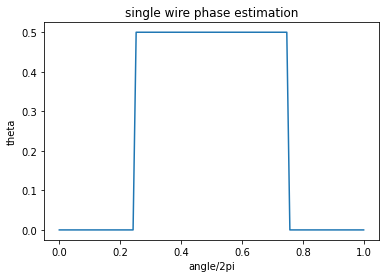

In [ ]:
import matplotlib.pyplot as plt

angles = np.linspace(0, 2*np.pi, 100)
phi1 = []
phi2 = []
for t in range(100):
  state=[(1., '01')]
  angle = angles[t]
  state = H(0, state)
  state = CNOT(0,1,state)
  state = Phase(1, angle/2, state)
  state = CNOT(0,1,state)
  state = Phase(1, -angle/2, state)
  state = Phase(0, -angle/2, state)
  state = H(0, state)
  vec = StateToVec(state)
  if abs(vec[1]) > abs(vec[3]):
    phi2.append(0)
  else:
    phi2.append(1/2)
plt.plot(angles/2/np.pi, phi2)
plt.title("single wire phase estimation")
plt.xlabel("angle/2pi")
plt.ylabel("theta")
plt.show()



In [ ]:
angle = 0.1432394487827058*np.pi
state=[(1., '01')]
state = H(0, state)
state = CNOT(0,1,state)
state = Phase(1, angle/2, state)
state = CNOT(0,1,state)
state = Phase(1, -angle/2, state)
state = Phase(0, -angle/2, state)
state = H(0, state)
print(state)
vec = StateToVec(state)
states = ['01','11']
prob = [abs(vec[1])**2, abs(vec[3])**2]
plt.bar(states, prob)
plt.title("0.1432")
plt.show()




In [ ]:
def CP(c, n, angle, state):
  state = CNOT(c,n,state)
  state = Phase(n, angle/2, state)
  state = CNOT(c,n,state)
  state = Phase(n, -angle/2, state)
  state = Phase(c, -angle/2, state)
  return state

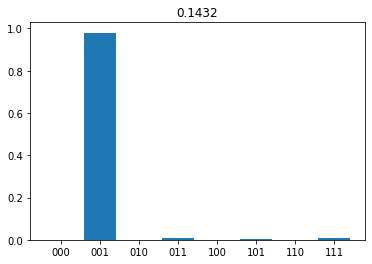

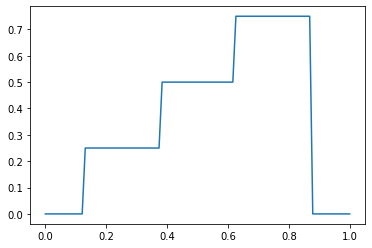

In [ ]:
angles = np.linspace(0, 2*np.pi, 100)
phi2 = []
for t in range(100):
  angle = angles[t]
  state=[(1., '001')]
  state = H(0, state)
  state = H(1, state)
  state = CP(1,2,angle, state)
  state = CP(0,2,angle, state)
  state = CP(0,2,angle, state)
  state = H(0, state)
  state = CP(0,1,-np.pi/2, state)
  state = H(1, state)
  state = CNOT(0,1, state)
  state = CNOT(1,0, state)
  state = CNOT(0,1, state)
  vec = StateToVec(state)
  maxi = max(abs(vec[1]),abs(vec[3]),abs(vec[5]),abs(vec[7]))
  if 0.143239>angles[t] and 0.143239<angles[t+1]:
    prob = []
    x = []
    for i in range(len(vec)):
      prob.append(abs(vec[i])**2)
      x.append(decimalToBinary(i).zfill(3))
    plt.title("0.1432")
    plt.bar(x, prob)
    plt.show()
  if maxi == abs(vec[1]):
    phi2.append(0)
  elif maxi == abs(vec[3]):
    phi2.append(1/4)
  elif maxi == abs(vec[5]):
    phi2.append(1/2)
  else:
    phi2.append(3/4)
plt.plot(angles/2/np.pi, phi2)

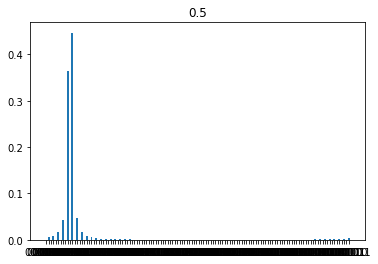

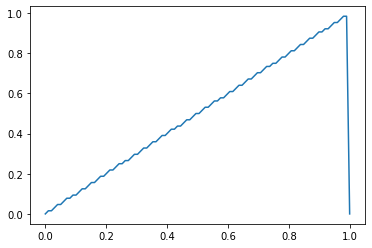

In [ ]:
angles = np.linspace(0, 2*np.pi, 100)
phi2 = []
for t in range(100):
  angle = angles[t]
  state=[(1., '0000001')]
  state = H(0, state)
  state = H(1, state)
  state = H(2, state)
  state = H(3, state)
  state = H(4, state)
  state = H(5, state)
  state = CP(5,6,angle, state)
  for i in range(2):
    state = CP(4,6,angle, state)
  for i in range(4):
    state = CP(3,6,angle, state)
  for i in range(8):
    state = CP(2,6,angle, state)
  for i in range(16):
    state = CP(1,6,angle, state)
  for i in range(32):
    state = CP(0,6,angle, state)
  state = H(0, state)
  state = CP(0,1,-np.pi/2, state)
  state = H(1, state)
  state = CP(0,2,-np.pi/4, state)
  state = CP(1,2,-np.pi/2, state)
  state = H(2, state)
  state = CP(0,3,-np.pi/8, state)
  state = CP(1,3,-np.pi/4, state)
  state = CP(2,3,-np.pi/2, state)
  state = H(3, state)
  state = CP(0,4,-np.pi/16, state)
  state = CP(1,4,-np.pi/8, state)
  state = CP(2,4,-np.pi/4, state)
  state = CP(3,4,-np.pi/2, state)
  state = H(4, state)
  state = CP(0,5,-np.pi/32, state)
  state = CP(1,5,-np.pi/16, state)
  state = CP(2,5,-np.pi/8, state)
  state = CP(3,5,-np.pi/4, state)
  state = CP(4,5,-np.pi/2, state)
  state = H(5, state)
  for i in range(0, 5):
    state = CNOT(i,i+1, state)
    state = CNOT(i+1,i, state)
    state = CNOT(i,i+1, state)
  for i in reversed(range(0, 4)):
    state = CNOT(i,i+1, state)
    state = CNOT(i+1,i, state)
    state = CNOT(i,i+1, state)
  for i in range(1, 4):
    state = CNOT(i,i+1, state)
    state = CNOT(i+1,i, state)
    state = CNOT(i,i+1, state)
  for i in reversed(range(1, 3)):
    state = CNOT(i,i+1, state)
    state = CNOT(i+1,i, state)
    state = CNOT(i,i+1, state)
  for i in range(2, 3):
    state = CNOT(i,i+1, state)
    state = CNOT(i+1,i, state)
    state = CNOT(i,i+1, state)
  vec = StateToVec(state)
  vecs = []
  for i in vec:
    vecs.append(abs(i))
  if 0.5>angles[t] and 0.5<angles[t+1]:
    prob = []
    x = []
    for i in range(len(vec)):
      prob.append(abs(vec[i])**2)
      x.append(decimalToBinary(i).zfill(7))
    plt.title("0.5")
    plt.bar(x, prob)
    plt.show()
  maxi = max(vecs)
  for i in range(128):
    if vecs[i] == maxi:
      phi2.append((i-1)/128)
      #break
plt.plot(angles/2/np.pi, phi2)
plt.show()

In [ ]:
angles = np.linspace(0, 2*np.pi, 100)
phi2 = []
for t in range(100):
  angle = angles[t]
  state=[(np.sqrt(0.3), '0000000'), (np.sqrt(0.7), '0000001')]
  state = H(0, state)
  state = H(1, state)
  state = H(2, state)
  state = H(3, state)
  state = H(4, state)
  state = H(5, state)
  state = CP(5,6,angle, state)
  for i in range(2):
    state = CP(4,6,angle, state)
  for i in range(4):
    state = CP(3,6,angle, state)
  for i in range(8):
    state = CP(2,6,angle, state)
  for i in range(16):
    state = CP(1,6,angle, state)
  for i in range(32):
    state = CP(0,6,angle, state)
  state = H(0, state)
  state = CP(0,1,-np.pi/2, state)
  state = H(1, state)
  state = CP(0,2,-np.pi/4, state)
  state = CP(1,2,-np.pi/2, state)
  state = H(2, state)
  state = CP(0,3,-np.pi/8, state)
  state = CP(1,3,-np.pi/4, state)
  state = CP(2,3,-np.pi/2, state)
  state = H(3, state)
  state = CP(0,4,-np.pi/16, state)
  state = CP(1,4,-np.pi/8, state)
  state = CP(2,4,-np.pi/4, state)
  state = CP(3,4,-np.pi/2, state)
  state = H(4, state)
  state = CP(0,5,-np.pi/32, state)
  state = CP(1,5,-np.pi/16, state)
  state = CP(2,5,-np.pi/8, state)
  state = CP(3,5,-np.pi/4, state)
  state = CP(4,5,-np.pi/2, state)
  state = H(5, state)
  for i in range(0, 5):
    state = CNOT(i,i+1, state)
    state = CNOT(i+1,i, state)
    state = CNOT(i,i+1, state)
  for i in reversed(range(0, 4)):
    state = CNOT(i,i+1, state)
    state = CNOT(i+1,i, state)
    state = CNOT(i,i+1, state)
  for i in range(1, 4):
    state = CNOT(i,i+1, state)
    state = CNOT(i+1,i, state)
    state = CNOT(i,i+1, state)
  for i in reversed(range(1, 3)):
    state = CNOT(i,i+1, state)
    state = CNOT(i+1,i, state)
    state = CNOT(i,i+1, state)
  for i in range(2, 3):
    state = CNOT(i,i+1, state)
    state = CNOT(i+1,i, state)
    state = CNOT(i,i+1, state)
  vec = StateToVec(state)
  vecs = []
  for i in vec:
    vecs.append(abs(i))
  if np.pi>angles[t] and np.pi<angles[t+1]:
    prob = []
    x = []
    for i in range(len(vec)):
      prob.append(abs(vec[i])**2)
      x.append(decimalToBinary(i).zfill(7))
    plt.title("0.5")
    plt.bar(x, prob)
    plt.show()
  maxi = max(vecs)
  for i in range(128):
    if vecs[i] == maxi:
      phi2.append((i-1)/128)
      #break
plt.plot(angles/2/np.pi, phi2)
plt.show()

In [ ]:
def BigSwap(up, state):
    if up % 2 == 0:
      for i in range(int(up/2)-1):
        for j in range(i, up-1-i):
          state = CNOT(j,j+1, state)
          state = CNOT(j+1,j, state)
          state = CNOT(j,j+1, state)
        for j in reversed(range(i, up-2-i)):
          state = CNOT(j,j+1, state)
          state = CNOT(j+1,j, state)
          state = CNOT(j,j+1, state)
      state = CNOT(int(up/2)-1,int(up/2), state)
      state = CNOT(int(up/2),int(up/2)-1, state)
      state = CNOT(int(up/2)-1,int(up/2), state)
    else:
      for i in range(int((up+1)/2) - 1):
        for j in range(i, up-1-i):
          state = CNOT(j,j+1, state)
          state = CNOT(j+1,j, state)
          state = CNOT(j,j+1, state)
        for j in reversed(range(i, up-2-i)):
          state = CNOT(j,j+1, state)
          state = CNOT(j+1,j, state)
          state = CNOT(j,j+1, state)
    return state
state=[(1, '001110')]
BigSwap(5, state)

[(1, '111000')]

In [ ]:
def PE(up,bottom, stated, angles):
  phi2 = []
  for m in range(len(angles)):
    state = stated
    angle = angles[m]
    for i in range(up):
      state = H(i, state)##
    for i in range(up):
      for j in range(2**i):
        for t in range(bottom):
          state = CP(up-i-1,up+t,angle, state)
    for i in range(0, up-1):#up=6
      state = H(i, state)
      for j in range(i + 1):
        state = CP(j,i+1,-np.pi/2**(i+1)*2**(j), state)
    state = H(up-1, state)
    ###################
    state = BigSwap(up, state)
    ##################
    vec = StateToVec(state)
    vecs = []
    for i in vec:
      vecs.append(abs(i))
    if 0.143239>=angles[m] and 0.143239<=angles[m+1]:
      prob = []
      x = []
      for i in range(len(vec)):
        prob.append(abs(vec[i])**2)
        x.append(decimalToBinary(i).zfill(up+bottom))
      plt.title("0.1432")
      plt.bar(x, prob)
      plt.show()
    maxi = max(vecs)
    for i in range(2**(up+bottom)):
      if vecs[i] == maxi:
        phi2.append((i-1)/2**(up+bottom))
        break
  plt.plot(angles/2/np.pi, phi2)
  plt.show()
angles = np.linspace(0, 2*np.pi, 100)
PE(6,2, [(1., '00000010')], angles)

In [ ]:
bottom, gates = ReadInput('3.txt')

In [ ]:
print(bottom)
print(gates)

2
[['NOT', '0'], ['P', '0', '0.3'], ['NOT', '1']]


H 0
H 1
H 2
CNOT 2 3
CPHASE 2 3 0.3
CNOT 2 4
CNOT 1 3
CPHASE 1 3 0.3
CNOT 1 4
CNOT 1 3
CPHASE 1 3 0.3
CNOT 1 4
CNOT 0 3
CPHASE 0 3 0.3
CNOT 0 4
CNOT 0 3
CPHASE 0 3 0.3
CNOT 0 4
CNOT 0 3
CPHASE 0 3 0.3
CNOT 0 4
CNOT 0 3
CPHASE 0 3 0.3
CNOT 0 4


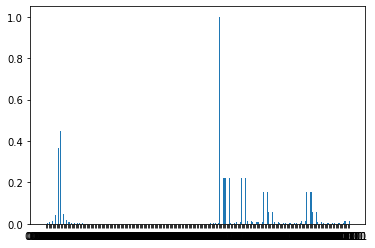

In [ ]:
import matplotlib.pyplot as plt

def PEFile(up, bottom, stated, gates):
    state = stated
    for i in range(up):
      state = H(i, state)##
      print("H", i)
    for i in range(up):
      for j in range(2**i):
          for gate in gates:
            if gate[0] == 'P':
              state = CP(up-i-1, int(gate[1])+up, float(gate[2]), state)
              print("CPHASE", up-i-1, int(gate[1])+up, float(gate[2]))
            elif gate[0] == 'NOT':
              state = CNOT(up-i-1,int(gate[1])+up, state)
              print('CNOT', up-i-1,int(gate[1])+up)
    for i in range(0, up-1):#up=6
      state = H(i, state)
      for j in range(i + 1):
        state = CP(j,i+1,-np.pi/2**(i+1)*2**(j), state)
    state = H(up-1, state)
    ###################
    state = BigSwap(up, state)
    ##################
    vec = StateToVec(state)
    vecs = []
    for i in range(len(vec)):
        prob.append(abs(vec[i])**2)
        x.append(decimalToBinary(i).zfill(up+bottom))
    plt.bar(x, prob)
    plt.show()
state=[(1, '00000')]
PEFile(3, bottom, state, gates)

### QFT

In [ ]:
def CP(c, n, angle, state):
  state = CNOT(c,n,state)
  state = Phase(n, -angle/2, state)
  state = CNOT(c,n,state)
  state = Phase(n, angle/2, state)
  state = Phase(c, angle/2, state)
  return state

In [ ]:
state = [(1, '101')]
CP(0, 2, np.pi/4, state)

[((0.7071067811865475+0.7071067811865476j), '101')]

In [ ]:
def QFT(wire, state):
  state = BigSwap(wire, state)
  state = H(wire-1, state)
  for i in reversed(range(0, wire-1)):
    for j in reversed(range(i + 1)):
      state = CP(j,i+1,np.pi/2**(i+1)*2**(j), state)
    state = H(i, state)
  #state = BigSwap(wire, state)
  vec = StateToVec(state)
  return vec
state = [(1.,'00001')]
vec = QFT(5,state)
print(VecToState(vec))
#PrettyPrintInteger(VecToState(vec))

[((0.1767766952966368+0j), '00000'), ((0.17337998066526833+0.03448742241036787j), '00001'), ((0.163320370609547+0.06764951251827458j), '00010'), ((0.14698445030241972+0.0982118697983877j), '00011'), ((0.12499999999999997+0.12499999999999996j), '00100'), ((0.09821186979838771+0.14698445030241974j), '00101'), ((0.06764951251827458+0.16332037060954696j), '00110'), ((0.03448742241036785+0.1733799806652683j), '00111'), ((1.9626155733547187e-17+0.1767766952966368j), '01000'), ((-0.034487422410367834+0.17337998066526833j), '01001'), ((-0.06764951251827454+0.163320370609547j), '01010'), ((-0.09821186979838765+0.14698445030241972j), '01011'), ((-0.12499999999999996+0.12499999999999997j), '01100'), ((-0.14698445030241972+0.09821186979838774j), '01101'), ((-0.16332037060954693+0.06764951251827461j), '01110'), ((-0.1733799806652683+0.03448742241036786j), '01111'), ((-0.1767766952966368+0j), '10000'), ((-0.17337998066526833-0.03448742241036787j), '10001'), ((-0.163320370609547-0.06764951251827458j)

In [ ]:
state = [(1.,'001')]
print(BigSwap(3, state))

[(1.0, '100')]


In [ ]:
def QFTFile(wire):
  f = open("QFT.circuit", "w")
  f.write(str(wire)+'\n')
  f.write("H "+str(wire-1)+'\n')
  for i in reversed(range(0, wire-1)):
    for j in reversed(range(i + 1)):
      f.write('CPHASE '+str(j)+" "+str(i+1)+" "+str(np.pi/2**(i+1)*2**(j))+'\n')
    f.write("H "+str(i)+'\n')
  if wire % 2 == 0:
      for i in range(int(wire/2)):
        f.write('SWAP '+" "+str(i)+" "+str(wire-i-1)+'\n')
  else:
    for i in range(int((wire-1)/2)):
        f.write('SWAP '+" "+str(i)+" "+str(wire-i-1)+'\n')
QFTFile(3)

In [ ]:
ReadWrite('QFT.circuit', 3)

In [ ]:

wires, gates = ReadInput('rewrite.circuit')
GatesAndMeasure(wires, gates)

# PrettyPrintInteger(x)

[(0.3535533905932737, '000'),
 (0.3535533905932737, '001'),
 ((0.3535533905932737+0j), '010'),
 ((0.3535533905932737+0j), '011'),
 ((-0.3535533905932736-1.3877787807814454e-17j), '100'),
 ((-0.3535533905932736-1.3877787807814454e-17j), '101'),
 ((-0.3535533905932736+0j), '110'),
 ((-0.3535533905932736+0j), '111')]

In [ ]:
def GatesAndMeasure2(wires, gates):
  if gates[0][0] == 'INITSTATE':
    if gates[0][1] == 'FILE':
      state = Input2(gates[0][2])
    else:
      state = ([(1., gates[0][2][1:-1])])
  else:
    bits = ''
    for i in range(wires):
      bits = bits + '0'
    state = [(1., bits)]
  vec = (StateToVec(state))
  for gate in gates:
    if gate[0] == 'H':
      vec = numpy.matmul(HadamardArray(int(gate[1]),wires), vec)
      #vec = HadamardArray(int(gate[1]),wires) @ vec
    elif gate[0] == 'P':
      #vec = Phase(int(gate[1]),wires, float(gate[2])) @ vec
      vec = numpy.matmul(PhaseArray(int(gate[1]),wires, float(gate[2])), vec)
    elif gate[0] == 'CNOT':
      vec = numpy.matmul(CNOTArray(int(gate[1]),int(gate[2]), wires), vec)
    elif gate[0].lower() == 'measure':
      state = VecToState(vec)
      prob = []
      for st in state:
        prob.append((np.abs(st[0])**2, st[1]))
      print("measurement:",prob)
  return VecToState(vec)

### shor

In [ ]:
from math import gcd
from numpy.random import randint
def factorFinder(num, x):
  if gcd(x, num) != 1:
    return 0
  notfound = True
  r = 1
  while notfound:
    if x**r % num == 1:
      notfound = False
      return r
    r= r+1
  return 0
def classicalShor(num):
  badX = True
  while badX:
    x = randint(1, num)
    r = factorFinder(num, x)
    if r != 0 and r % 2 ==0:
      print("N",num,"X",x)
      return "X",x, "factor",gcd((int(x**(r/2))-1) % num,num), gcd(int(x**(r/2)+1) % num,num)
classicalShor(51)



N 51 X 10


('X', 10, 'factor', 3, 17)

In [ ]:
import numpy as np
from numpy.linalg import eig
def Matri(x,N):
  for i in range(N):
    if 2**i >= N:
      wire = i
      break
  #print(wire)
  M = np.zeros([2**wire,2**wire])
  for j in range(N):
    M[j][x*j % N] = 1
  for j in range(N, 2**wire):
    M[j][j] = 1
  return M
Matri(3, 13) #@ Matri(3, 7).T

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [ ]:

def PE2(up,bottom, stated, angles):
    state = stated
    for i in range(up):
      state = H(i, state)##
    for i in range(0, up):
      for j in range(2**i):
        for t in range(bottom):
          state = CP(up-i-1,up+t,angle, state)
    for i in range(0, up-1):#up=6
      state = H(i, state)
      for j in range(i + 1):
        state = CP(j,i+1,-np.pi/2**(i+1)*2**(j), state)
    state = H(up-1, state)
    ###################
    state = BigSwap(up, state)
    ##################
    vec = StateToVec(state)
    vecs = []
    for i in range(len(vec)):
      vecs.append(abs(vec[i]))
    maxi = max(vecs)
    for i in range(2**(up+bottom)):
      if vecs[i] == maxi:
        phi2.append((i-1)/2**(up+bottom))
        break
  plt.plot(angles/2/np.pi, phi2)
  plt.show()
PE2(6,6, [(1., '100001111111')], angles)